In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2]:
def GamaFunct(X,gama):
    return (1+gama)*np.power(X,gama)-gama*np.power(X,(1+gama))

In [23]:
def MakeBasePlot(Max,Xs,XoptN,gama,Bmax,SoilEff,RootEff,BiomassScaller):
    
    NegativeAxis = range(0,(Max+1)*-1,-10)
    PositiveAxis = range(0,(Max+1),10) 
    RelativeUptake = [min(1,float(X)/XoptN) for X in PositiveAxis]
    Beta = [(1+gama)*np.power(X,gama)-gama*np.power(X,(1+gama)) for X in RelativeUptake]
    Biomass = [Bmax * BiomassScaller * X for X in Beta]
    FieldAvailableN = np.multiply([X-Xs for X in NegativeAxis],SoilEff)
    FieldUptakeN = [min(XoptN,np.multiply(X,RootEff))for X in PositiveAxis]
    FieldUstar =  [min(1,float(X*-1)/XoptN) for X in FieldAvailableN]
    FieldBstar = [GamaFunct(X,gama) for X in FieldUstar]
    FieldBiomass = [Bmax * BiomassScaller * X for X in FieldBstar]

    Graph = plt.figure(figsize=(12,12))
    Soil = plt.plot(NegativeAxis,FieldAvailableN,color='brown',linewidth=3)
    Root = plt.plot(FieldUptakeN,NegativeAxis,color='orange',linewidth=3)
    Shoot = plt.plot(PositiveAxis,Biomass,color='green',linewidth=3)
    Field = plt.plot(NegativeAxis,FieldBiomass,color='blue',linewidth=3)
    Grid1 = plt.plot([0,0],[-(Max*2),Max*2],color='k')
    Grid2 = plt.plot([-(Max*2),Max*2],[0,0],color='k')
    plt.ylim(-(Max*1.15),(Bmax * BiomassScaller * 1.15))
    plt.xlim(-(Max*1.15),Max*1.15)
    plt.yticks([-(Max),0,Bmax * BiomassScaller],[Max,0,Bmax],fontsize=16)
    plt.xticks([-Max,0,Max],[Max,0,Max],fontsize=16)
    plt.text(Max*0.25,-Max*1.25,'Crop N Uptake (kg/ha)',fontsize=18)
    plt.text(-Max*1.25,-Max*0.25,'Soil N Available (kg/ha)',fontsize=18,rotation=90)
    plt.text(-Max*0.9,-Max*1.25,'Fertiliser N Inputs (kg/ha)',fontsize=18)
    plt.text(-Max*1.25,Max*0.75,'Crop Biomass (kg/ha)',fontsize=18,rotation=90)
    plt.text(-Max*1.1,Max,'Field',fontsize=20)
    plt.text(-Max*1.1,-Max*1.1,'Soil',fontsize=20)
    plt.text(Max*0.9,-Max*1.1,'Roots',fontsize=20)
    plt.text(Max*0.85,Max,'Canopy',fontsize=20)

In [16]:
def WalkCoordinates(WalkInputN,Xs,Es,Er,BiomassScaller,XoptN,gama,Bmax):
    WalkCoords = pd.DataFrame(index = [0,1,2,3,4],columns=['X','Y'])
    WalkCoords.ix[0,'Y'] = 0                                   #Startpoint
    WalkCoords.ix[0,'X'] = -WalkInputN                         
    WalkCoords.ix[1,'X'] = -WalkInputN
    WalkCoords.ix[1,'Y'] = (WalkCoords.ix[1,'X']-Xs)*Es
    WalkCoords.ix[2,'Y'] = WalkCoords.ix[1,'Y']
    WalkCoords.ix[2,'X'] = np.abs(WalkCoords.ix[2,'Y']*Er)
    WalkCoords.ix[3,'X'] = WalkCoords.ix[2,'X']
    Ustar = float(WalkCoords.ix[3,'X'])/XoptN
    Bstar = GamaFunct(Ustar,gama)
    if Ustar < 1:
        WalkCoords.ix[3,'Y'] = Bstar * Bmax * BiomassScaller
    else:
        WalkCoords.ix[3,'Y'] = Bmax * BiomassScaller
    WalkCoords.ix[4,'X'] = WalkCoords.ix[1,'X']
    WalkCoords.ix[4,'Y'] = WalkCoords.ix[3,'Y']
    return WalkCoords

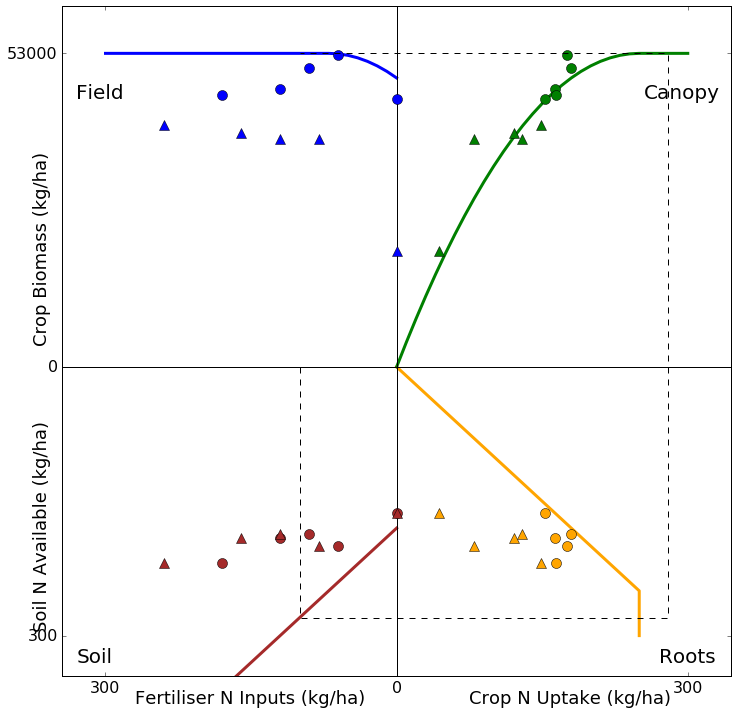

In [28]:
PlotMax = 300
NonFertN = 10
InitialN = 170
Xs = NonFertN + InitialN
XoptN = 250
gama = 1
Bmax = 53000
Es = 1
Er = 1
BiomassScaller = float(XoptN)/float(Bmax) * 1.4


PlantFert = np.multiply([0,90,120,180,60] , -1)
PlantInitN = np.multiply([173,197,201,229,210] , -1)
PlantAvailableN = np.add(PlantInitN,NonFertN)
PlantUptakeN = [153,180,163,164,176]
PlantBiomass = np.multiply([45362,50607,46901,45900,52786],BiomassScaller)
Rat2Fert = np.multiply([0,120,160,240,80] , -1)
Rat2InitN = np.multiply([149,46,56,107,129] , -1)
Rat2AvailableN = np.add(PlantInitN,NonFertN)
Rat2UptakeN = [44,129,121,149,80]
Rat2Biomass = np.multiply([19505,38604,39465,40947,38557],BiomassScaller)

MakeBasePlot(PlotMax,Xs,XoptN,gama,Bmax,Es,Er,BiomassScaller)

PlantSoil = plt.plot(PlantFert,PlantAvailableN,'o',color='brown',linewidth=3,markersize = 10)
PlantRoot = plt.plot(PlantUptakeN,PlantAvailableN,'o',color='orange',linewidth=3,markersize = 10)
PlantShoot = plt.plot(PlantUptakeN,PlantBiomass,'o',color='green',linewidth=3,markersize = 10)
PlantField = plt.plot(PlantFert,PlantBiomass,'o',color='blue',linewidth=3,markersize = 10)

Rat2Soil = plt.plot(Rat2Fert,Rat2AvailableN,'^',color='brown',linewidth=3,markersize = 10)
Rat2Root = plt.plot(Rat2UptakeN,Rat2AvailableN,'^',color='orange',linewidth=3,markersize = 10)
Rat2Shoot = plt.plot(Rat2UptakeN,Rat2Biomass,'^',color='green',linewidth=3,markersize = 10)
Rat2Field = plt.plot(Rat2Fert,Rat2Biomass,'^',color='blue',linewidth=3,markersize = 10)

WalkPath = WalkCoordinates(100,Xs,Es,Er,BiomassScaller,XoptN,gama,Bmax)
plt.plot(WalkPath.X,WalkPath.Y,'--',color='k')

In [21]:
min(2,3)

2

In [38]:
AvailableN

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]